<a href="https://colab.research.google.com/github/kanishka9389/kanishka/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()
car_review_df = pd.read_csv("/content/CarPrice_project.csv")

Saving CarPrice_project.csv to CarPrice_project (3).csv


In [ ]:
import pandas as pd # import the pandas library and assign it to the alias 'pd'
from google.colab import files
uploaded = files.upload()
car_reviewdf = pd.read_csv("/content/CarPrice_project.csv")

In [ ]:
car_review_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(f'number of rows:{car_review_df.shape[0]}')
print(f'number of columns:{car_review_df.shape[1]}')

number of rows:205
number of columns:26


In [ ]:
car_review_df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
def complete_info():
  null = pd.DataFrame(index=car_review_df.columns)
  null['data_type'] = car_review_df.dtypes
  null['null_count'] = car_review_df.isnull().sum()
  null['unique_count'] = car_review_df.nunique()
  return null


In [ ]:
complete_info()

,data_type,null_count,unique_count
car_ID,int64,0,205
symboling,int64,0,6
CarName,object,0,147
fueltype,object,0,2
aspiration,object,0,2
doornumber,object,0,2
carbody,object,0,5
drivewheel,object,0,3
enginelocation,object,0,2
wheelbase,float64,0,53


In [ ]:
len(car_review_df['carbody'].unique())


5

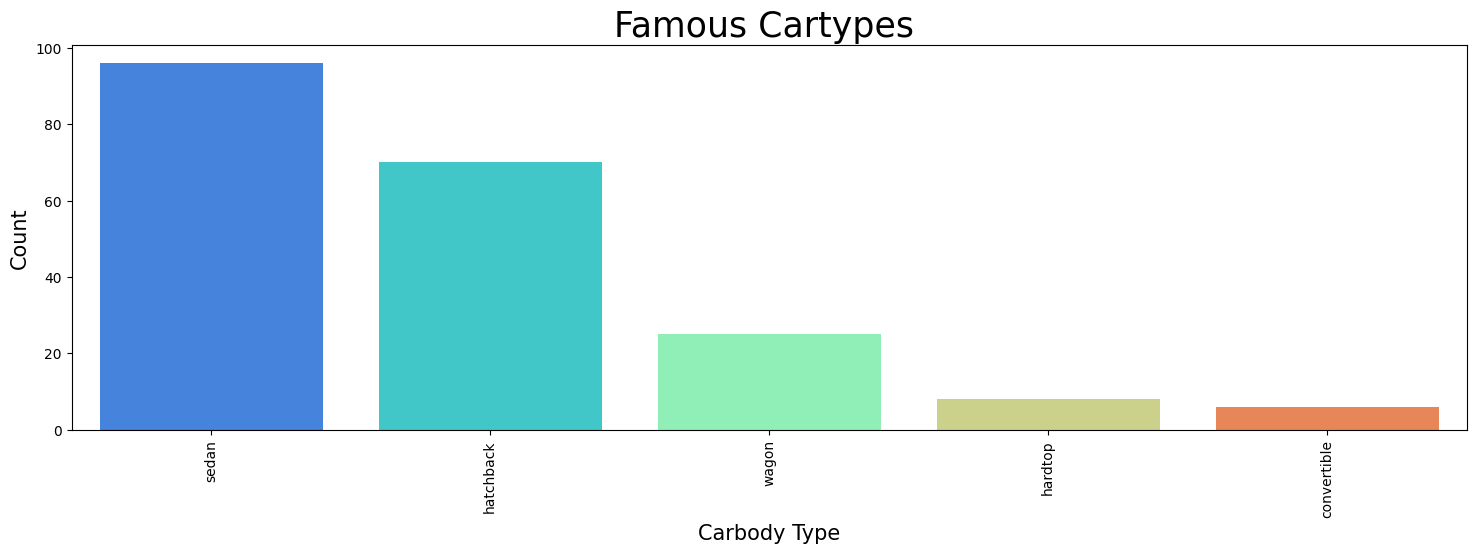

In [ ]:
x = car_review_df['carbody'].value_counts().index
y = car_review_df['carbody'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
 xaxis.append(x[i])
 yaxis.append(y[i])
# Plotting graph/visuals for the same
plt.figure(figsize=(18,5))
plt.xlabel("Carbody Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Famous Cartypes ", fontsize = 25);

In [ ]:
Top3_carbody =car_review_df['carbody'].value_counts().reset_index().head(3)
Top3_carbody.rename(columns={'index':'Carbody Type','Carbody Types':'Count'},inplace=True)
Top3_carbody


,carbody,count
0,sedan,96
1,hatchback,70
2,wagon,25


In [ ]:
Top3_carbody = car_review_df['carbody'].value_counts().nlargest(3).reset_index()
Top3_carbody.columns = ['CarBody', 'Count']
print(Top3_carbody)

     CarBody  Count
0      sedan     96
1  hatchback     70
2      wagon     25


In [ ]:
print(car_review_df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


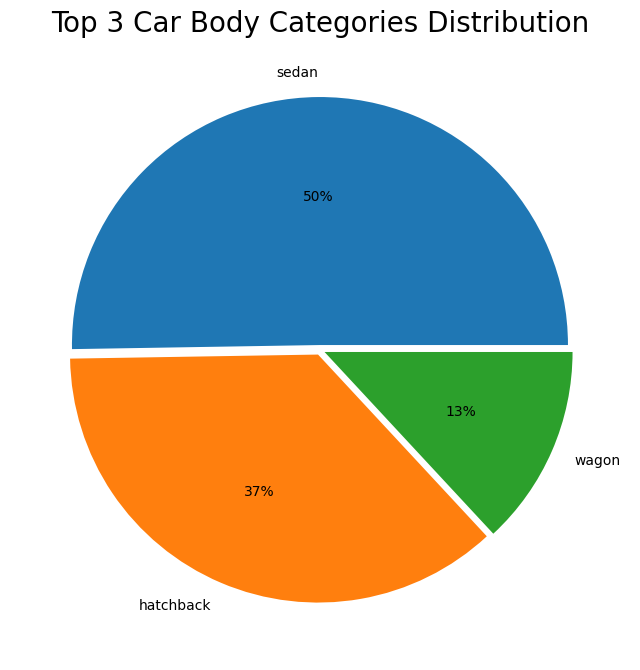

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
plt.pie(Top3_carbody['Count'], labels=Top3_carbody['CarBody'], autopct='%.0f%%', explode=[0.02]*3)
plt.title('Top 3 Car Body Categories Distribution', fontsize=20)
plt.show()

Text(0, 0.5, 'Frequency')

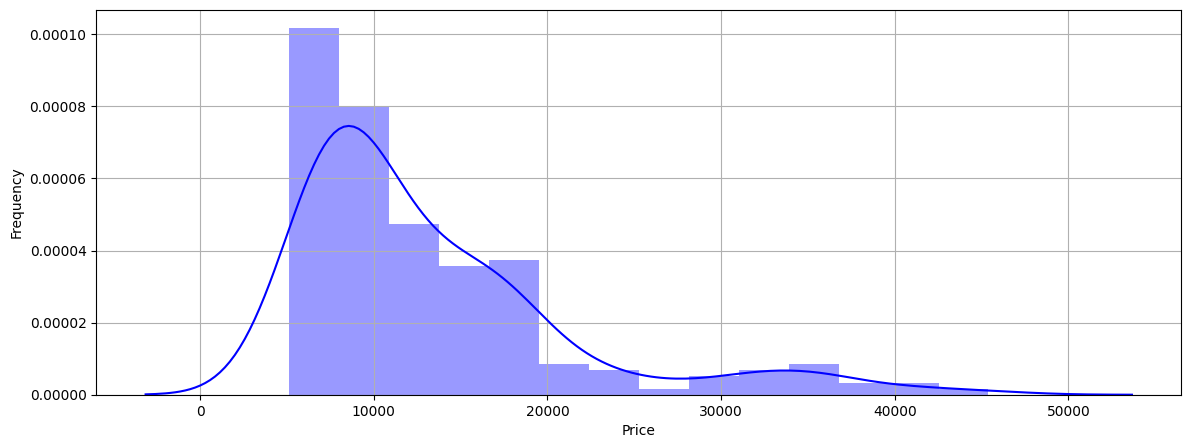

In [ ]:
plt.figure(figsize=(14,5))
sns.distplot(car_review_df['price'],color = 'blue')
plt.grid()
plt.xlabel("Price")
plt.ylabel("Frequency")

In [ ]:
print('The average price range in cars is is',car_review_df['price'].mean())



The average price range in cars is is 13276.710570731706


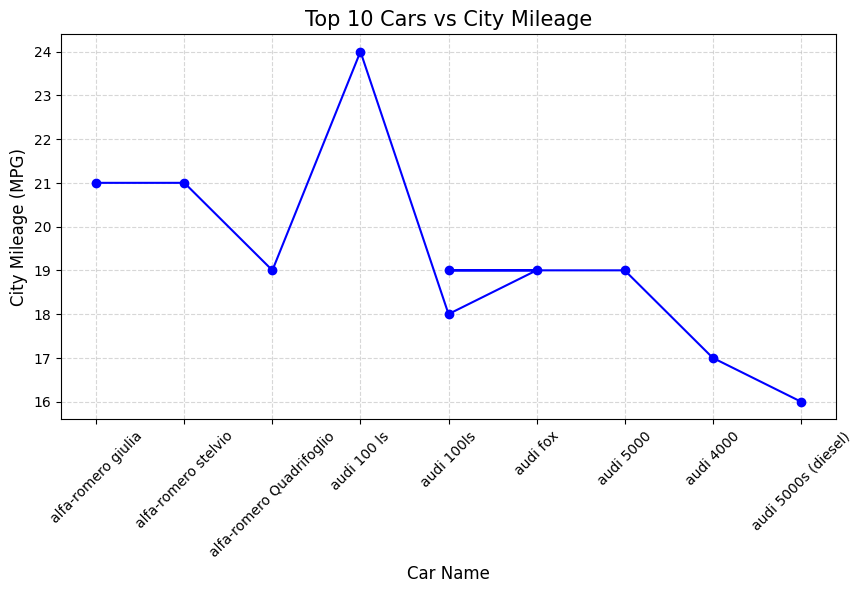

In [ ]:
top_10_cars =car_review_df.head(10)

plt.figure(figsize=(10,5))
plt.plot(top_10_cars["CarName"], top_10_cars["citympg"], marker='o', linestyle='-', color='b')

plt.xlabel("Car Name", fontsize=12)
plt.ylabel("City Mileage (MPG)", fontsize=12)
plt.title("Top 10 Cars vs City Mileage", fontsize=15)

plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

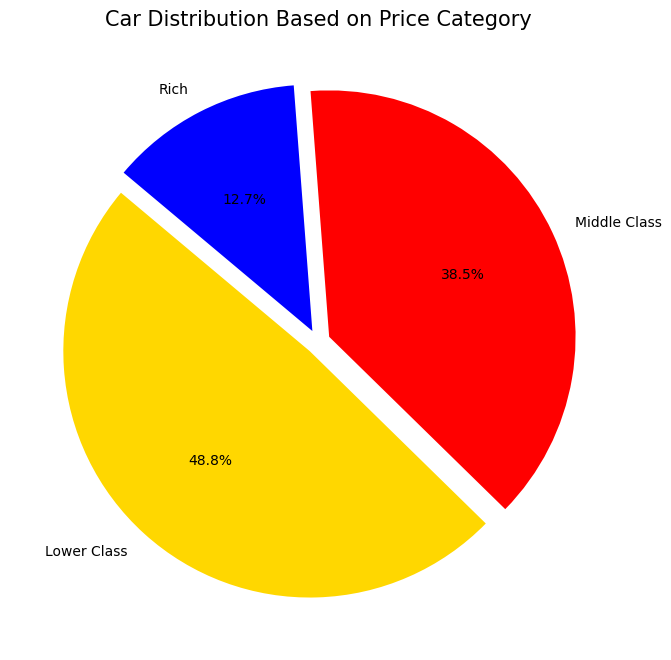

In [ ]:
def categorize_price(price):
    if price > 50000:
        return "Super Rich"
    elif price > 20000:
        return "Rich"
    elif price > 10000:
        return "Middle Class"
    else:
        return "Lower Class"

# Price ko categories mein convert karna
car_review_df["Price_Category"] = car_review_df["price"].apply(categorize_price)

# Har category ka count nikalna
price_distribution = car_review_df["Price_Category"].value_counts()

# Explode ka size dynamically set karna
explode_values = [0.05] * len(price_distribution)

# Pie chart plot karna
plt.figure(figsize=(8,8))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%.1f%%',
        explode=explode_values, colors=["gold", "red", "blue", "green"], startangle=140)
plt.title("Car Distribution Based on Price Category", fontsize=15)
plt.show()

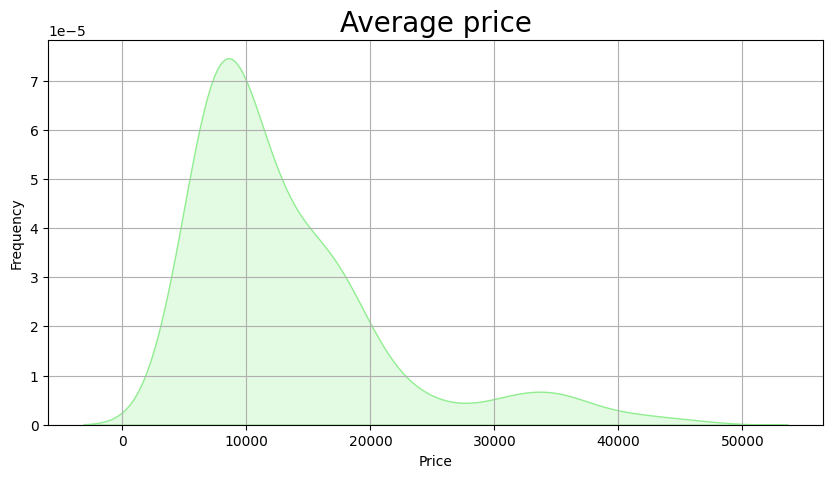

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid()
size_distribution_graph = sns.kdeplot(car_review_df['price'], color="lightgreen", shade = True)
plt.title('Average price',size = 20);



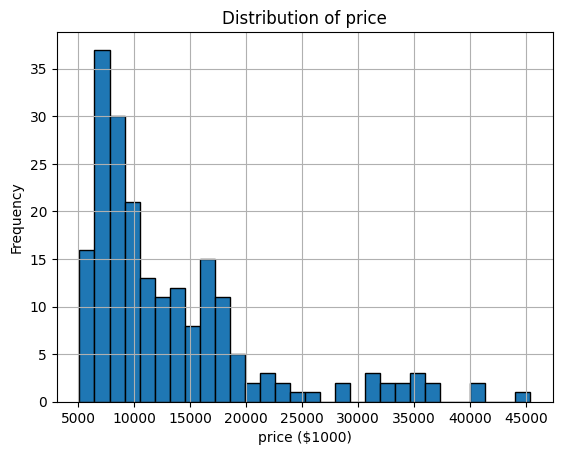

In [ ]:
car_review_df['price'].hist(bins=30, edgecolor='black')
plt.title('Distribution of price')
plt.xlabel('price ($1000)')
plt.ylabel('Frequency')
plt.show()



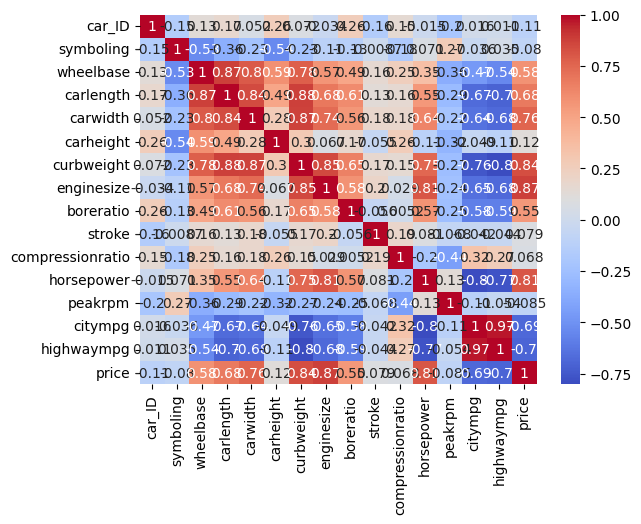

In [ ]:
numerical_features = car_review_df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


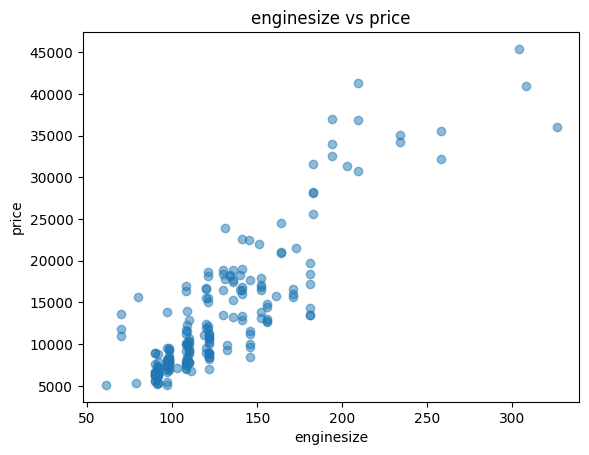

In [ ]:
plt.scatter(car_review_df['enginesize'],car_review_df['price'],alpha=0.5)
plt.title('enginesize vs price')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

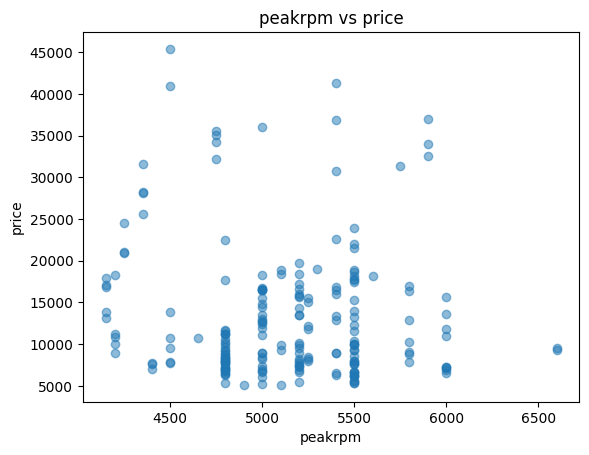

In [ ]:
plt.scatter(car_review_df['peakrpm'],car_review_df['price'],alpha=0.5)
plt.title('peakrpm vs price')
plt.xlabel('peakrpm')
plt.ylabel('price')
plt.show()



In [ ]:
X=car_review_df.drop(['price'],axis=1)
X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
Y=car_review_df['price']
Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
X_train[0:10]


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,four,134,idi,3.43,3.64,22.0,72,4200,31,39
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,four,92,2bbl,3.05,3.03,9.0,62,4800,31,37
96,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,...,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,95,4150,28,33
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,...,four,156,mfi,3.60,3.90,7.0,145,5000,19,24
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43


In [ ]:
numerical_features = X.select_dtypes(include=np.number).columns
X_train, X_test, Y_train, Y_test = train_test_split(
    X[numerical_features], Y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
X_train

array([[0.32352941, 0.4       , 0.63103448, ..., 0.02040816, 0.5625    ,
        0.67647059],
       [0.54411765, 0.4       , 0.73448276, ..., 0.34693878, 0.1875    ,
        0.23529412],
       [0.75      , 0.4       , 0.3137931 , ..., 0.26530612, 0.5625    ,
        0.61764706],
       ...,
       [0.45098039, 0.6       , 0.27241379, ..., 0.42857143, 0.5625    ,
        0.61764706],
       [0.87745098, 1.        , 0.56206897, ..., 0.42857143, 0.1875    ,
        0.23529412],
       [0.5       , 0.4       , 0.47586207, ..., 0.42857143, 0.125     ,
        0.17647059]])

In [ ]:
regression=LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [ ]:
regression.intercept_



np.float64(3899.818725401372)

In [ ]:
regression.coef_

array([ -2595.64230896,   1139.26505328,   3378.92004781,  -3133.53392485,
         5019.27201536,   3037.69182072,   1506.48942266,  28909.07179109,
          715.16072987,  -6861.9850832 ,   5754.2213498 ,   6818.36740147,
         5644.71370407, -12492.99543164,   7131.25542817])

In [ ]:
Y_pred=regression.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)
print(mse)

11710105.078807378


In [ ]:
r2=r2_score(Y_test,Y_pred)
print(r2)


0.8516657126363215


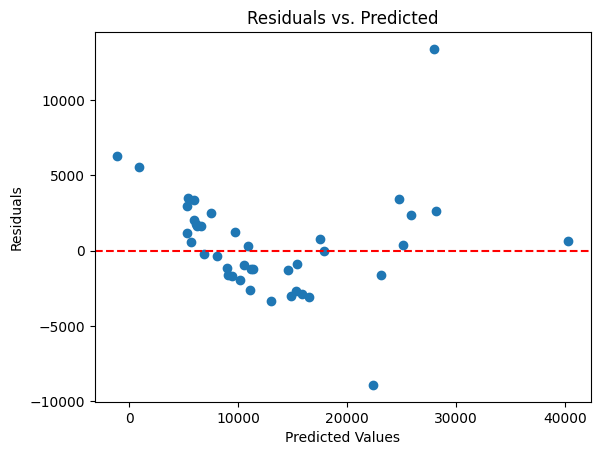

In [ ]:
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, Y_train)


Ridge()

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)


Lasso(alpha=0.1)

In [ ]:
Y_pred_lin = regression.predict(X_test)
Y_pred_ridge = ridge_reg.predict(X_test)
Y_pred_lasso = lasso_reg.predict(X_test)
Y_pred_lin, Y_pred_ridge, Y_pred_lasso


(array([28136.61662501, 17897.05420754, 10501.64869541, 14894.10445051,
        25867.1892059 ,  6173.84364331,  8980.28750149,  5919.21217674,
        11392.64574211,  9460.45070261, 14560.47727625,  5262.80065897,
        17528.77959034,  7491.46641038, 40299.85379014,  5336.56626822,
        -1096.23360087, 15347.30470178, 10145.97735703, 11163.54831384,
        11083.28073461, 22416.79275323,  6592.9098689 ,   938.10218382,
         6895.75103695, 27936.87659594, 12978.79601747, 16477.60756576,
         5956.53671362, 15851.60074806, 25165.44825207,  5672.24625495,
         6140.96330188, 23125.61626048,  8083.42458411, 24748.61143859,
        10938.04831201,  9709.93935657,  5425.3770443 , 15389.31688372,
         9064.98801667]),
 array([25927.80133305, 19503.31562143, 10297.50416771, 15068.26617235,
        25232.08978457,  6322.35833311,  7620.45019414,  6182.72622369,
        11577.81438159,  7856.56592495, 13828.61273993,  6260.53401415,
        16267.18446962,  8705.17420521